## Observations and Insights 

In [43]:
# Dependencies and Setup
 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_mice=len(combined["Mouse ID"].unique())
number_mice

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = combined[combined.duplicated(['Mouse ID' , 'Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined.drop_duplicates("Mouse ID")



In [5]:
# Checking the number of mice in the clean DataFrame.
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group=combined.groupby(['Drug Regimen'])

mean_vol=drug_group['Tumor Volume (mm3)'].mean()
med_vol=drug_group['Tumor Volume (mm3)'].median()
var_vol=drug_group['Tumor Volume (mm3)'].var()
std_vol=drug_group['Tumor Volume (mm3)'].std()
sem_vol=drug_group['Tumor Volume (mm3)'].sem()

volume_table = pd.DataFrame({
    "Mean Volume": mean_vol,
    "Median Volume": med_vol,
    "Variance": var_vol,
    "Standard Deviation": std_vol,
    "SEM": sem_vol,
   
})
volume_table

,Mean Volume,Median Volume,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#need to isolate tumor volume
# Using the aggregation method, produce the same summary statistics in a single line
agg_vol=drug_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_vol

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

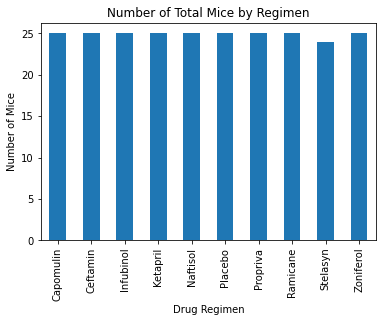

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_count=drug_group['Mouse ID'].count()

mouse_chart = mouse_count.plot(kind='bar')

mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of Mice")
mouse_chart.set_title("Number of Total Mice by Regimen")

plt.show()
plt.tight_layout()

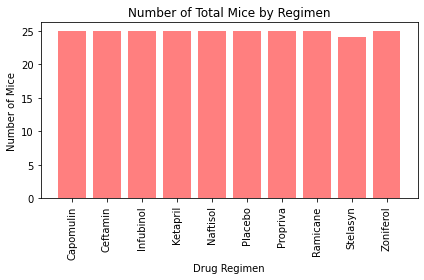

In [50]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_names=mouse_count.index
plt.bar(drug_names, mouse_count, color='r', alpha=0.5, align="center")
plt.xticks(list(drug_names), rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title("Number of Total Mice by Regimen")
plt.tight_layout()

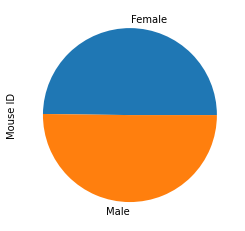

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group= combined.groupby(["Sex"]).count()["Mouse ID"]


gender_group.plot(kind='pie')
plt.show()

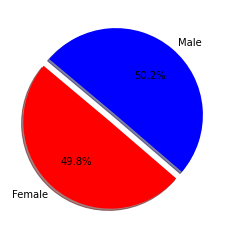

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders=gender_group.index

# The colors of each section of the pie chart
colors = ["red", "blue"]

explode = (0.1, 0)
plt.pie(gender_group, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Find the last time point which is 45
last_df = combined.loc[combined["Timepoint"] == 45]
last_df.head().reset_index()

# Select specified regimens 
trt_data = last_df.loc[last_df['Drug Regimen'].isin(['Capomulin' , 'Ramicane' ,'Infubinol' , 'Ceftamin'])]
trt_data
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [51]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = trt_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)   

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of final tumor volume is: 33.48002734
The upper quartile of final tumor volume is: 62.14221369
The interquartile range of final tumor volume is: 28.66218635
The the median of final tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


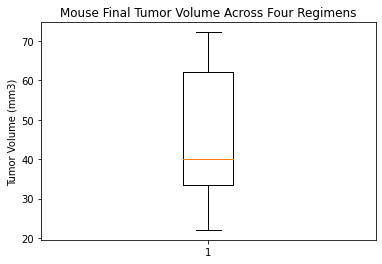

In [46]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Mouse Final Tumor Volume Across Four Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(trt_data['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_data = combined.loc[combined['Drug Regimen'].isin(['Capomulin'])]

#Capomulin_line = plt.plot('Time Point', 'Tumor Volume (mm3)', color="red", label="Capomulin")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


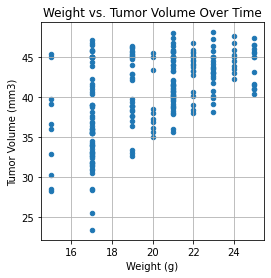

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_data.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4), title="Weight vs. Tumor Volume Over Time")
plt.show()

## Correlation and Regression

The r-squared is: 0.2763600223455911


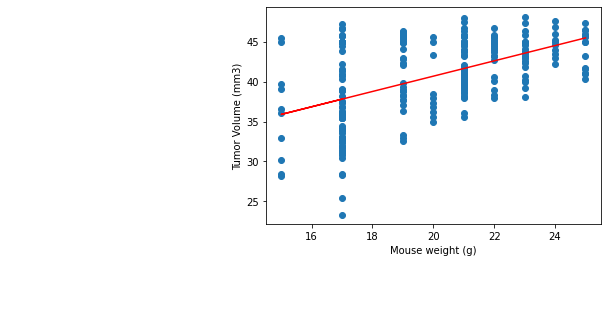

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capomulin_data['Weight (g)']
y_values = Capomulin_data['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
 